In [9]:
import pandas as pd
import numpy as np

# Merging both data sets into one

In [15]:
# Load the data from the first data set
cash_request_df = pd.read_csv('project_dataset\extract - cash request - data analyst.csv')
fees_df = pd.read_csv('project_dataset\extract - fees - data analyst - .csv')

# Merge both files using a full outer join on the 'id' column
merged_df = pd.merge(cash_request_df, fees_df, left_on="id", right_on="cash_request_id", how="outer", suffixes=("_cash_request", "_fees"))

# Saving the merged Data Frame to a CSV file
merged_file_path = "merged_data.csv"
merged_df.to_csv(merged_file_path, index=False)

# Provide the path to the saved merged file
merged_file_path

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\crvid\AppData\Local\Temp\ipykernel_40720\2728439560.py:2: SyntaxWarning: invalid escape sequence '\e'
  cash_request_df = pd.read_csv('project_dataset\extract - cash request - data analyst.csv')
C:\Users\crvid\AppData\Local\Temp\ipykernel_40720\2728439560.py:3: SyntaxWarning: invalid escape sequence '\e'
  fees_df = pd.read_csv('project_dataset\extract - fees - data analyst - .csv')


'merged_data.csv'

# Exploratory Data Analysis

In [16]:
# Load the data set
file_path = "merged_data.csv"
data = pd.read_csv(file_path)

#Display the data
data.head()

,id_cash_request,amount,status_cash_request,created_at_cash_request,updated_at_cash_request,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,status_fees,category,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment
0,3.0,1.0,canceled,2019-11-19 13:57:53.511561+00,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,100.0,money_back,2019-12-09 14:47:35.190714+00,2020-11-04 12:54:52.120014+00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00,2020-12-18 22:47:47.993817+00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Summary statistics of the dataset
data_summary = data.describe(include="all")

# Checking the shape
data_shape = data.shape

# Checking for missing values
missing_values = data.isnull().sum()

# Display all
# print(data_summary)
# print(data_shape)
print(missing_values)

id_cash_request                   4
amount                            4
status_cash_request               4
created_at_cash_request           4
updated_at_cash_request           4
user_id                        2576
moderated_at                  10339
deleted_account_id            29525
reimbursement_date                4
cash_request_received_date     7949
money_back_date                8181
transfer_type                     4
send_at                        9420
recovery_status               24898
reco_creation                 24898
reco_last_update              24898
id_fees                       11037
cash_request_id               11041
type                          11037
status_fees                   11037
category                      29902
total_amount                  11037
reason                        11037
created_at_fees               11037
updated_at_fees               11037
paid_at                       16567
from_date                     24332
to_date                     

# Data Quality Analysis: cleaning & processing

In [34]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Filling or dropping missing values in 'amount' with appropriate values
data_cleaned = data.dropna(subset=["amount"]).copy()

# Filling missing values in 'status_cash_request' with unknown
data_cleaned.loc[:, 'status_cash_request'] = data_cleaned["status_cash_request"].fillna("unknown")

# Display the first few rows to confirm the cleaning process
print(data_cleaned.head())


   id_cash_request  amount    status_cash_request  \
0              3.0     1.0               canceled   
1              4.0   100.0             money_back   
2              5.0   100.0               rejected   
3              6.0   100.0  direct_debit_rejected   
4              7.0   100.0               rejected   

         created_at_cash_request        updated_at_cash_request  user_id  \
0  2019-11-19 13:57:53.511561+00  2020-12-14 10:25:57.710844+00     47.0   
1  2019-12-09 14:47:35.190714+00  2020-11-04 12:54:52.120014+00      NaN   
2  2019-12-10 19:05:21.596873+00   2019-12-11 16:47:42.40783+00    804.0   
3  2019-12-10 19:05:48.921042+00  2020-12-18 22:47:47.993817+00    812.0   
4   2019-12-10 19:13:35.82546+00  2019-12-11 09:46:59.779773+00    191.0   

                    moderated_at  deleted_account_id  \
0         2019-11-20 12:16:50+00                 NaN   
1         2019-12-09 14:58:28+00              1309.0   
2  2019-12-11 16:47:42.405646+00                 NaN   


# Visualizing 'amount' and 'status_cash_request'

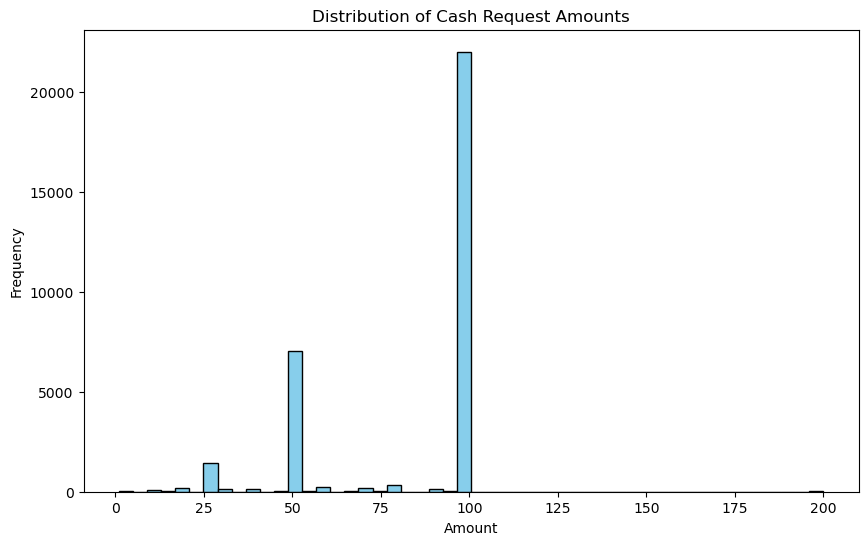

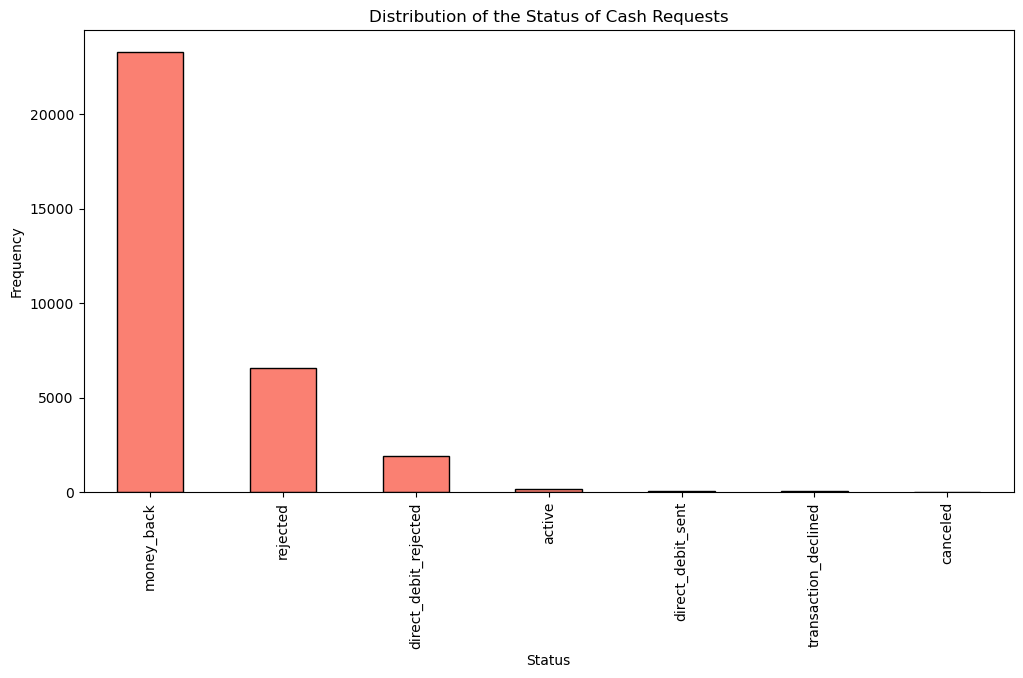

In [41]:
# Building 'amount'
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Cash Request Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Building 'status_cash_request'
status_counts = data_cleaned["status_cash_request"]. value_counts()
plt.figure(figsize=(12, 6))
status_counts.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Distribution of the Status of Cash Requests")
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.show()



# Creating cohorts by month

In [76]:
# Work on a copy
data_cleaned = data_cleaned.copy()

# Convert 'created_at' to datetime in order to sort the value by month
data_cleaned["created_at_cash_request"] = pd.to_datetime(data_cleaned["created_at_cash_request"], errors="coerce").dt.tz_localize(None)

# Extract cohort month and year from 'created_at_cash_request' by directly assigning to the new column 'cohort_mont'
data_cleaned["cohort_month"] = data_cleaned["created_at_cash_request"].dt.to_period("M")

# Display the first few rows
data_cleaned.head()

,id_cash_request,amount,status_cash_request,created_at_cash_request,updated_at_cash_request,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,total_amount,reason,created_at_fees,updated_at_fees,paid_at,from_date,to_date,charge_moment,cohort_month,incident
0,3.0,1.0,canceled,2019-11-19 13:57:53.511561,2020-12-14 10:25:57.710844+00,47.0,2019-11-20 12:16:50+00,NaN,2019-12-05 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11,0
1,4.0,100.0,money_back,2019-12-09 14:47:35.190714,2020-11-04 12:54:52.120014+00,NaN,2019-12-09 14:58:28+00,1309.0,2019-12-16 23:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,0
2,5.0,100.0,rejected,2019-12-10 19:05:21.596873,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,1
3,6.0,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042,2020-12-18 22:47:47.993817+00,812.0,2019-12-11 09:40:33+00,NaN,2020-02-05 23:00:00+00,2019-12-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,1
4,7.0,100.0,rejected,2019-12-10 19:13:35.825460,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12,1


# 1. Frequency of Service Usage

Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

In [87]:
# Grouping by Cohort: We'll group the data by 'cohort_month' and 'user_id' to calculate how many times each user used the service using .size().
cohort_usage = data_cleaned.groupby(["cohort_month", "user_id"]).size().reset_index(name="usage_count")

# It then groups by cohort_month again and calculates the average service usage for each cohort using .mean().
cohort_frequency = cohort_usage.groupby('cohort_month')['usage_count'].mean().reset_index() #reset index converts the result into data frame

# Rename columns for clarity
cohort_frequency.columns = ['cohort_month', 'average_usage_per_user']

# Display the average service usage frequency by cohort
cohort_frequency.head()


,cohort_month,average_usage_per_user
0,2019-11,1.000000
1,2019-12,1.121951
2,2020-01,1.106918
3,2020-02,1.068027
4,2020-03,1.131148


# 2. Incident Rate

Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

In [67]:
# Create a new column 'incident' for each cohort
data_cleaned["incident"] = data_cleaned["status_cash_request"].apply(lambda x: 1 if x in ["rejected", "direct_debit_rejected"] else 0) 
"""The lambda function now handles both "rejected" and "direct_debit_rejected" as incidents."""

# Calculate the mean of incidents for each  cohort month to get the incident rate.
cohort_incident_rate = data_cleaned.groupby('cohort_month')['incident'].mean().reset_index() #reset index converts the result into data frame

# Rename columns for clarity
cohort_incident_rate.columns = ['cohort_month', 'incident_rate']

# Display the incident rate by cohort
cohort_incident_rate.head()

,cohort_month,incident_rate
0,2019-11,0.000000
1,2019-12,0.463668
2,2020-01,0.542601
3,2020-02,0.445652
4,2020-03,0.319672


# 3. Revenue generated by the cohort

Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

In [90]:
# Sum the 'amount' for each 'cohort_month' to get the total revenue.
cohort_revenue = data_cleaned.groupby("cohort_month")["amount"].sum().reset_index()

# Rename columns for clarity
cohort_revenue.columns = ['cohort_month', 'total_revenue']

# Display the total revenue by cohort
cohort_revenue.head()

,cohort_month,total_revenue
0,2019-11,1.0
1,2019-12,27297.0
2,2020-01,21587.0
3,2020-02,16653.0
4,2020-03,23549.0


# 3. New Relevant Metric: retention rates
Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

In [86]:
# Create a new column 'usage_count' that counts the number of times each user used the service
data_cleaned['usage_count'] = data_cleaned.groupby('user_id')['id_cash_request'].transform('count')

# Determine the percentage of users in each cohort who made more than one transaction.
cohort_retention = data_cleaned.groupby("cohort_month")["usage_count"].apply(lambda x: (x > 1).mean()).reset_index()
cohort_retention.columns = ["cohort_month", "retention_rate"]

# Display the retention rates by cohort
cohort_retention.head()

,cohort_month,retention_rate
0,2019-11,1.000000
1,2019-12,0.570934
2,2020-01,0.645740
3,2020-02,0.755435
4,2020-03,0.803279
